In [1]:
# Install kaggle
!pip install kaggle



In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d camnugent/california-housing-prices

# Unzip dataset
!unzip california-housing-prices.zip

# Load dataset



cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 45.1MB/s]
Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [68]:
import pandas as pd
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
data.dropna(inplace=True)


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

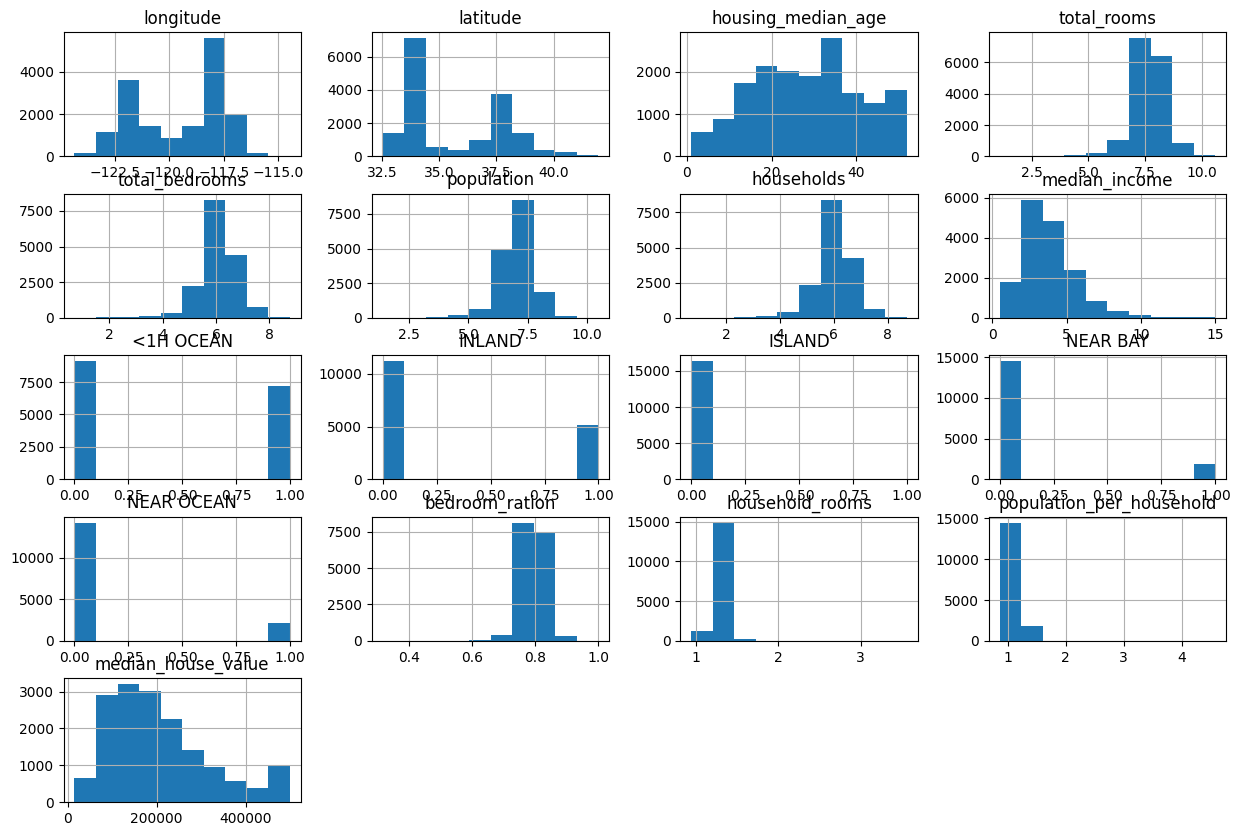

In [73]:
data = pd.concat([x_train, y_train], axis=1)
data.hist(figsize=(15, 10))
plt.show()

In [77]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ration,household_rooms,population_per_household,median_house_value
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,1,0,0,0,0,0.813816,1.235350,1.162976,227600.0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,0,1,0,0,0,0.749416,1.344506,1.245227,110400.0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,0,1,0,0,0,0.815812,1.246236,1.134033,248100.0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,1,0,0,0,0,0.882690,1.142841,1.165689,305600.0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,0,0,0,0,1,0.794652,1.252109,1.194630,214600.0


In [74]:
x.drop("ocean_proximity", axis=1, inplace = True)

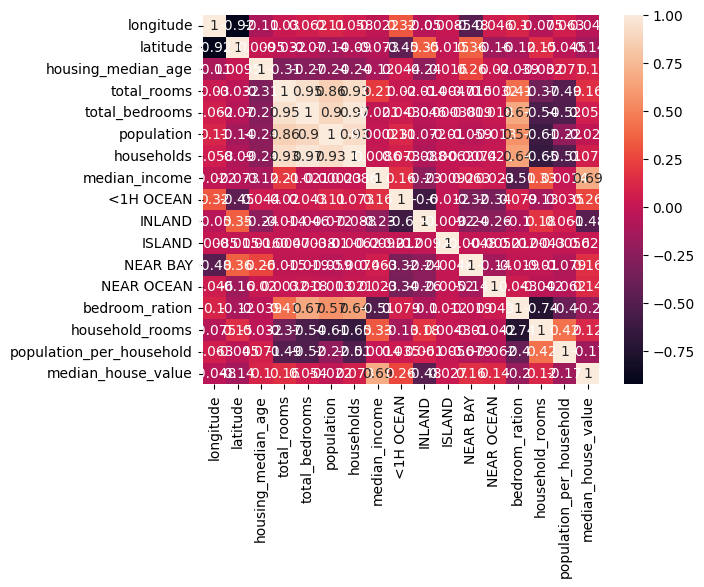

In [75]:
sns.heatmap(data.corr(), annot=True)

plt.show()

In [78]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ration,household_rooms,population_per_household,median_house_value
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,1,0,0,0,0,0.813816,1.235350,1.162976,227600.0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,0,1,0,0,0,0.749416,1.344506,1.245227,110400.0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,0,1,0,0,0,0.815812,1.246236,1.134033,248100.0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,1,0,0,0,0,0.882690,1.142841,1.165689,305600.0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,0,0,0,0,1,0.794652,1.252109,1.194630,214600.0


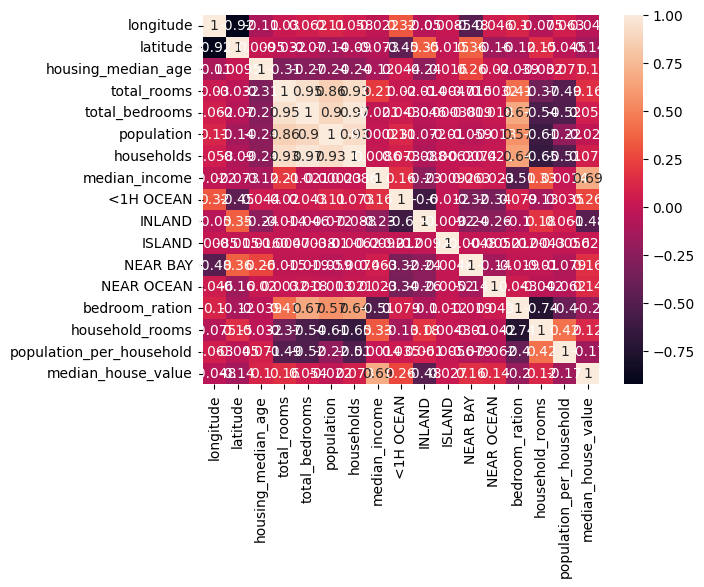

<Figure size 1000x700 with 0 Axes>

In [79]:
sns.heatmap(data.corr(), annot=True)
plt.figure(figsize=(10, 7))
plt.show()

In [80]:
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1 )
data['total_rooms'] = np.log(data['total_rooms'] + 1 )
data['population'] = np.log(data['population'] + 1 )
data['households'] = np.log(data['households'] + 1 )


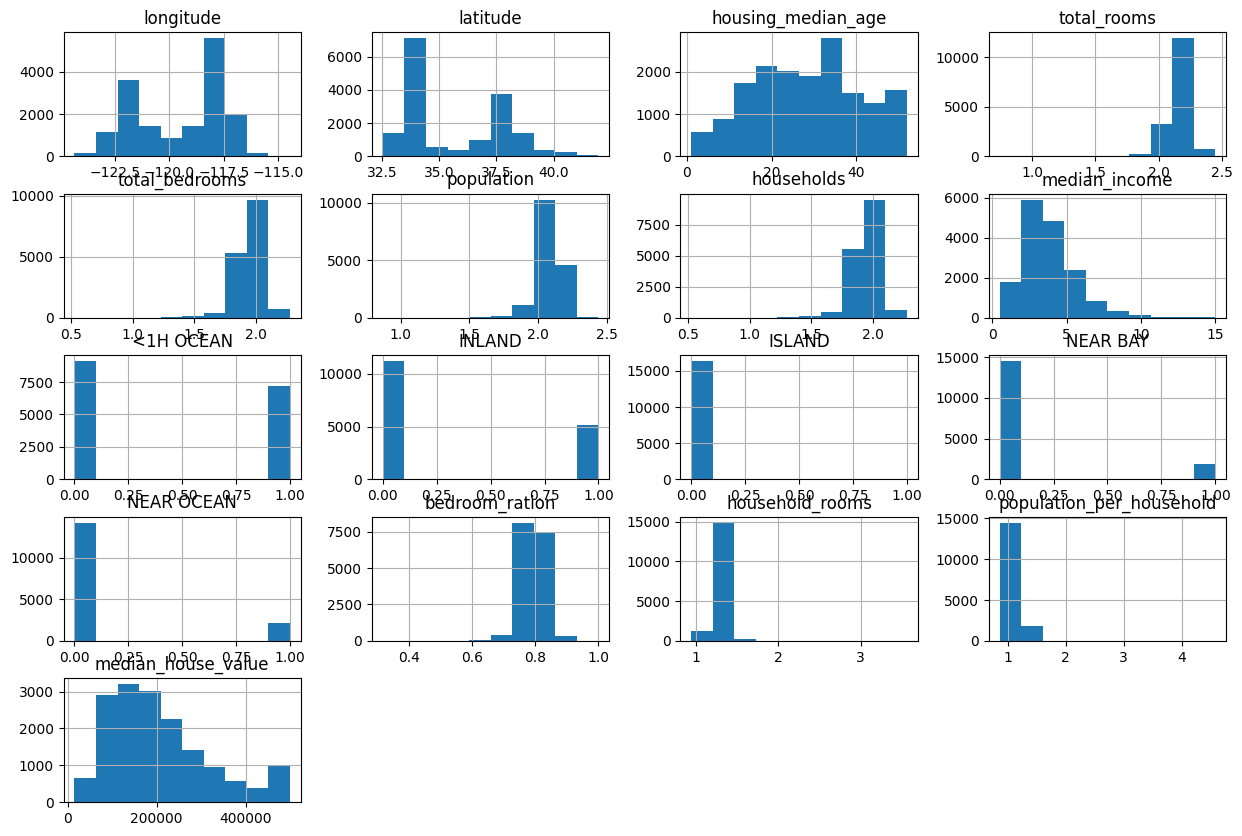

In [81]:
train_data.hist(figsize=(15, 10))
plt.show()

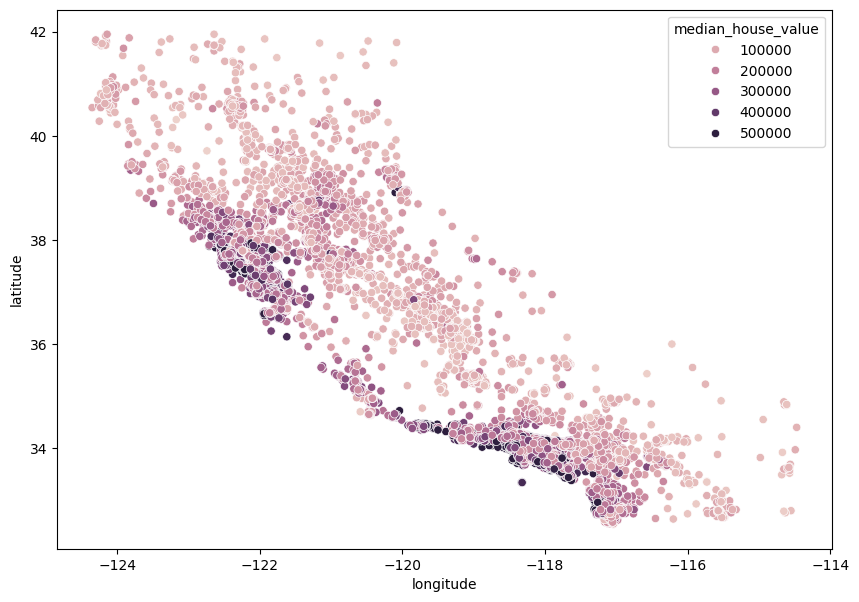

In [82]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="longitude", y="latitude", data= data, hue = "median_house_value")
plt.show()

In [83]:
data['bedroom_ration'] = data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']
data['population_per_household'] = data['population'] / data['households']

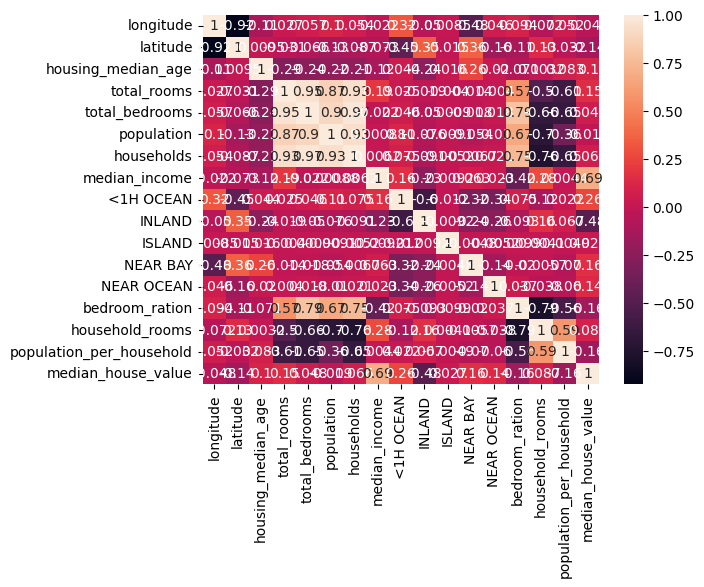

<Figure size 1000x700 with 0 Axes>

In [84]:
sns.heatmap(data.corr(), annot=True)
plt.figure(figsize=(10, 7))
plt.show()

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [93]:
x_train = data.drop("median_house_value", axis=1).dropna()
y_train = train_data["median_house_value"].dropna()

,median_house_value
17727,227600.0
2057,110400.0
6453,248100.0
4619,305600.0
15266,214600.0


In [95]:
reg.fit(x_train, y_train)

LinearRegression()

In [97]:
reg.score(x_train, y_train)

0.6705469179482755

In [98]:
x_test = test_data.drop("median_house_value", axis=1).dropna()
y_test = test_data["median_house_value"].dropna()

In [99]:
reg.fit(x_test, y_test)

LinearRegression()

In [100]:
reg.score(x_test, y_test)

0.6701273202913827

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rfr = RandomForestRegressor()

In [103]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [104]:
rfr.score(x_train, y_train)

0.973290572561016

In [106]:
rfr.fit(x_test, y_test)

RandomForestRegressor()

In [108]:
rfr.score(x_test, y_test)

0.9735602013053828

In [110]:
y_pred_rfr = rfr.predict(x_test)

In [109]:
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

In [112]:
print("\nRandom Forest Regression:")
print(f"Mean Squared Error: {mse_rfr}")
print(f"R-squared: {r2_rfr}")



Random Forest Regression:
Mean Squared Error: 349980401.26917917
R-squared: 0.9735602013053828
